In [19]:
import numpy as np
import pandas as pd

import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

from tensorflow.keras.metrics import Mean

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Discounting

In the continuous reinforcement learning problem we might want to maximize *expected discounted return* $G_t$ defined as:


$$\Large G_t = \sum_{k=0}^{\infty}\gamma^k R_{t + k + 1}$$


It can also be defined recursively:


$$\large G_t = R_{t + 1} + \gamma G_{t + 1}$$


Let's see how value of $\gamma$ drives reward discounting.

In [46]:
# Define rewards
rewards = np.ones(20)

# Define a set of discount factors gamma
gammas = np.arange(0.1, 1., .2).round(2)

In [44]:
# Get discounted rewards
discounted_rwrds = {}

for g in gammas:
    discounted_rwrds[g] = rewards * g**(np.arange(len(rewards)))

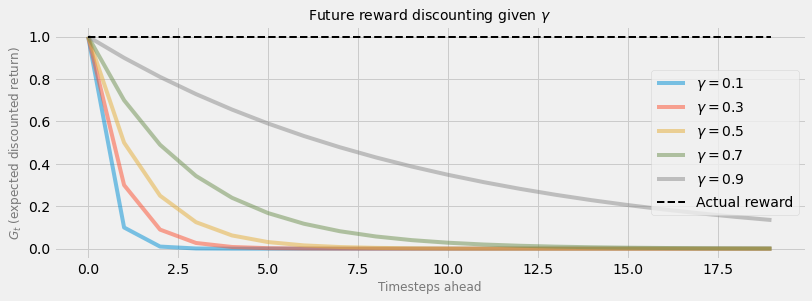

In [45]:
# Plot reward discounting given gamma
plt.figure(figsize=(12, 4))

for gamma in discounted_rwrds.keys():
    plt.plot(discounted_rwrds[gamma], label=f'$\\gamma={gamma}$', alpha=.5)

plt.plot(rewards, label='Actual reward', color='black', linestyle='--', linewidth=2)
plt.xlabel('Timesteps ahead', fontsize=12, alpha=.5)
plt.ylabel('$G_t$ (expected discounted return)', fontsize=12, alpha=.5)
plt.legend()
plt.title('Future reward discounting given $\\gamma$', fontsize=14)
plt.show()